In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\Users\wq\AppData\Local\Temp\ipykernel_3848\3511612726.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# load data
data = datasets.load_iris()
X = data.data
y = data.target

In [5]:
# crate dataframe
df = pd.DataFrame(X, columns=data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
# drop sepal length and width
df.drop(columns=['sepal length (cm)', 'sepal width (cm)'], inplace=True)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [7]:
df.isnull().sum()

petal length (cm)    0
petal width (cm)     0
dtype: int64

In [8]:
# scale data
ms = MinMaxScaler()
df['petal length (cm)'] = ms.fit_transform(df[['petal length (cm)']])
df['petal width (cm)'] = ms.fit_transform(df[['petal width (cm)']])
df

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


Text(0, 0.5, 'Petal Width (cm)')

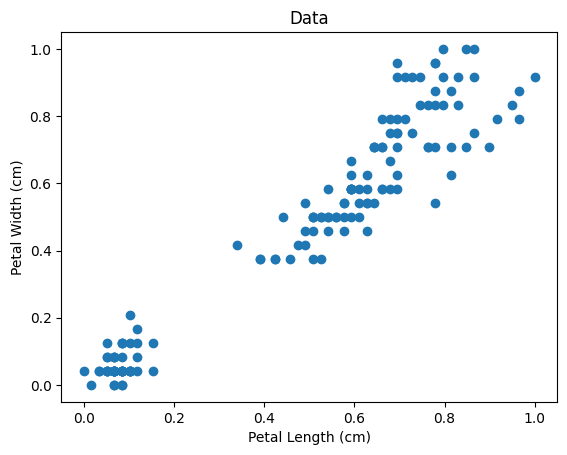

In [9]:
# visualize data
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.title('Data')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

In [10]:
# Elbow tenchnique
k_rng = range(1,10)
sse = []

for k in k_rng:
  km = KMeans(n_clusters=k)
  y_predicted = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
  sse.append(km.inertia_)


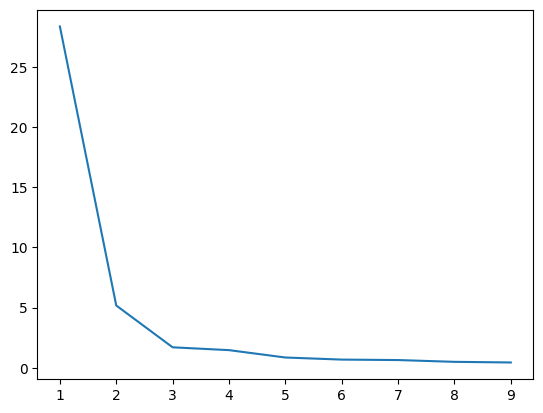

In [11]:
# Elbow plot
plt.plot(k_rng, sse)

In [12]:
# the best value for k is 2
k = 2
km = KMeans(n_clusters=k)
y_predicted = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
df['Cluster'] = y_predicted
df

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


In [15]:
# centroids
km.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.6620339 , 0.65666667]])

Text(0, 0.5, 'Petal Width (cm)')

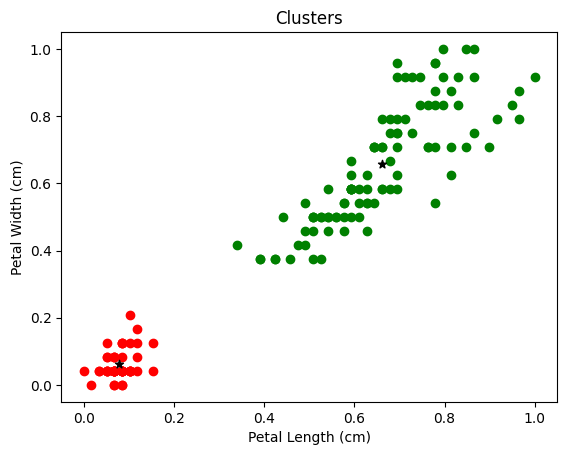

In [43]:
# visualize clusters
df1 = df[df['Cluster']==0]
df2 =df[df['Cluster']==1]


plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='green')

# centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*', color='black')

plt.title('Clusters')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')